In [1]:
import numpy as np
from scipy.optimize import linprog

## Python解决线性规划问题案例

In [2]:
c = np.array([-2, -3, 5])
Aeq = np.array([[1, 1, 1]])
beq = np.array([7])
A = np.array([[-2, 5, -1], [1, 3, 1]])
b = np.array([-10, 12])
x1, x2, x3 = (0, None), (0, None), (0, None)

res = linprog(c, A, b, Aeq, beq, bounds=(x1, x2, x3))
print(res)

     con: array([1.80713489e-09])
     fun: -14.571428565645059
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([-2.24614993e-10,  3.85714286e+00])
  status: 0
 success: True
       x: array([6.42857143e+00, 5.71428571e-01, 2.35900788e-10])


案例：

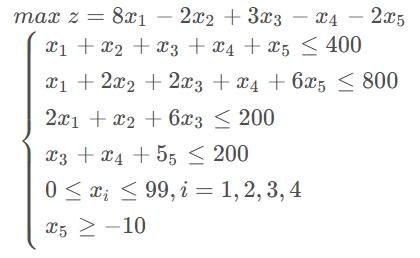

In [3]:
from scipy.optimize import linprog

c = [-8, 2, -3, 1, 2]
A = [[1, 1, 1, 1, 1], [1, 2, 2, 1, 6], [2, 1, 6, 0, 0], [0, 0, 1, 1, 5]]
b = [[400], [800], [200], [200]]
aeq = None
beq = None
bounds = ((0, 99), (0, 99), (0, 99), (0, 99), (-10, None))
res = linprog(c=c, A_ub=A, b_ub=b, A_eq=aeq, b_eq=beq, bounds=bounds, )

In [4]:
res

     con: array([], dtype=float64)
     fun: -812.9999732402536
 message: 'Optimization terminated successfully.'
     nit: 9
   slack: array([3.10666666e+02, 7.60333327e+02, 8.31001762e-06, 2.49666660e+02])
  status: 0
 success: True
       x: array([ 9.89999977e+01,  7.60795651e-07,  3.33332599e-01,  2.30736857e-06,
       -9.99999896e+00])

从中我们看出，目标函数z的最大值应为813左右，此时决策变量x1到x5的值分别为[99,0,0.3,0,-10]

奶牛场问题的求解：

In [5]:
c = [-72, -64]
A = [[1, 1], [12, 8]]
b = [[50], [480]]
bounds = ((0, 100 / 3.0), (0, None))
res = linprog(c=c, A_ub=A, b_ub=b, A_eq=None, b_eq=None, bounds=bounds)
res

     con: array([], dtype=float64)
     fun: -3359.999999912996
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([1.29553257e-09, 1.24094868e-08])
  status: 0
 success: True
       x: array([20., 30.])

从上面我们可以看出，利润最大值在3360元左右，达到最大值时，A、B产品的牛奶日用量分别是20桶、30桶

原油采购问题的设计

In [6]:
c = [110, 120, 130, 110, 115, -150]
A = [[1, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, 0], [8.8, 6.1, 2.0, 4.2, 5.0, -6], [-8.8, -6.1, -2.0, -4.2, -5.0, 3]]
b = [[200], [250], [0], [0]]
aeq = [[1, 1, 1, 1, 1, -1]]
beq = [[0]]
bounds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, 450))
# bounds=((0, None),(0, None),(0, None),(0, None),(0,None),(0,None))
res = linprog(c=c, A_ub=A, b_ub=b, A_eq=aeq, b_eq=beq, bounds=bounds)

In [7]:
res

     con: array([-3.97335498e-10])
     fun: -17592.592590807955
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([ 1.92649452e-08,  2.43114755e-08, -1.47838364e-09,  1.35000000e+03])
  status: 0
 success: True
       x: array([1.59259259e+02, 4.07407407e+01, 6.41578909e-10, 2.50000000e+02,
       1.09588827e-09, 4.50000000e+02])

从上面我们可以看到，五种原料油的采购量分别为[159.25,40.7407,0,250,0]（吨），此时总利润可以达到最大，约为17592英镑/月


In [8]:
import pulp as pp

# 目标函数的系数
z = [2, 3, 1]
a = [[1, 4, 2], [3, 2, 0]]
b = [8, 6]
aeq = [[1, 2, 4]]
beq = [101]

# 确定最大最小化问题，当前确定的是最大化问题
m = pp.LpProblem(sense=pp.LpMaximize)

# 定义三个变量放到列表中
x = [pp.LpVariable(f'x{i}', lowBound=0) for i in [1, 2, 3]]

# 定义目标函数，并将目标函数加入求解的问题中
m += pp.lpDot(z, x)  # lpDot 用于计算点积

# 设置比较条件
for i in range(len(a)):
    m += (pp.lpDot(a[i], x) >= b[i])

# 设置相等条件
for i in range(len(aeq)):
    m += (pp.lpDot(aeq[i], x) == beq[i])

# 求解
m.solve()
# 输出结果
print(f'优化结果：{pp.value(m.objective)}')
print(f'参数取值：{[pp.value(var) for var in x]}')

优化结果：202.0
参数取值：[101.0, 0.0, 0.0]


In [9]:
import pulp
import numpy as np
from pprint import pprint


def transportation_problem(costs, x_max, y_max):
    row = len(costs)
    col = len(costs[0])
    prob = pulp.LpProblem('Transportation Proble', sense=pulp.LpMaximize)
    var = [[pulp.LpVariable(f'x{i}{j}', lowBound=0, cat=pulp.LpInteger) for j in range(col)] for i in range(row)]
    # 转为一维
    flatten = lambda x: [y for l in x for y in flatten(l)] if type(x) is list else [x]
    prob += pulp.lpDot(flatten(var), costs.flatten())
    for i in range(row):
        prob += (pulp.lpSum(var[i]) <= x_max[i])
    for j in range(col):
        prob += (pulp.lpSum([var[i][j] for i in range(row)]) <= y_max[j])
    prob.solve()
    return {'objective': pulp.value(prob.objective),
            'var': [[pulp.value(var[i][j]) for j in range(col)] for i in range(row)]}


costs = np.array([[500, 550, 630, 1000, 800, 700],
                  [800, 700, 600, 950, 900, 930],
                  [1000, 960, 840, 650, 600, 700],
                  [1200, 1040, 980, 860, 880, 780]])
max_plant = [76, 88, 96, 40]
max_cultivation = [42, 56, 44, 39, 60, 59]
res = transportation_problem(costs, max_plant, max_cultivation)
print(f'最大值为{res["objective"]}')
print("各个变量的取值为：")
pprint(res['var'])

最大值为284230.0
各个变量的取值为：
[[0.0, 0.0, 6.0, 39.0, 31.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 29.0, 59.0],
 [2.0, 56.0, 38.0, 0.0, 0.0, 0.0],
 [40.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


e:\anaconda\lib\site-packages\pulp\pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
